In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Load the visits data
visit_data_path = ('BA Data Set\costs_us.csv') 
visits_data = pd.read_csv('BA Data Set\costs_us.csv')

In [59]:
# Display the first few rows of the dataset
visits_data.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [60]:
# convert 'Start Ts' and 'End Ts' to datetime format
visits_data['dt'] = pd.to_datetime(visits_data['dt'])

In [61]:
print(visits_data.columns)

Index(['source_id', 'dt', 'costs'], dtype='object')


In [62]:
#check for missing values and duplicates
missing_values = visits_data.isnull() .sum()
duplicates = visits_data.duplicated() .sum()

In [63]:
#Load the orders data
orders_data_path = 'BA Data Set\orders_log_us.csv'
orders_data = pd.read_csv(orders_data_path)


In [64]:
# Display the first few rows of the dataset
orders_data.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [65]:
# Convert 'Buy Ts' to datetime format
orders_data['Buy Ts'] = pd.to_datetime(orders_data['Buy Ts'])

In [66]:
# Check for missing values and duplicates
missing_values_orders = orders_data.isnull().sum()

In [67]:
# Check for missing values and duplicates
missing_values_orders = orders_data.isnull().sum()
duplicates_orders = orders_data.duplicated().sum()

In [68]:
# Load the costs data
costs_data_path = 'BA Data Set\costs_us.csv'
costs_data = pd.read_csv(costs_data_path)

In [69]:
# Convert 'dt' to date format
costs_data['dt'] = pd.to_datetime(costs_data['dt'])

In [70]:
# Check for missing values and duplicates
missing_values_costs = costs_data.isnull().sum()
duplicates_costs = costs_data.duplicated().sum()

In [71]:
# Calculate Daily Active Users (DAU), Weekly Active Users (WAU), Monthly Active Users (MAU)
visits_data['dt'] = pd.to_datetime(visits_data['dt'])
visits_data['day'] = visits_data['dt'].dt.date
visits_data['week'] = visits_data['dt'].dt.isocalendar().week
visits_data['month'] = visits_data['dt'].dt.to_period('M')

In [72]:
# DAU:
visits_data['dt'] = pd.to_datetime(visits_data['dt'])
visits_data['day'] = visits_data['dt'].dt.date
DAU = visits_data.groupby('day')['source_id'].nunique()

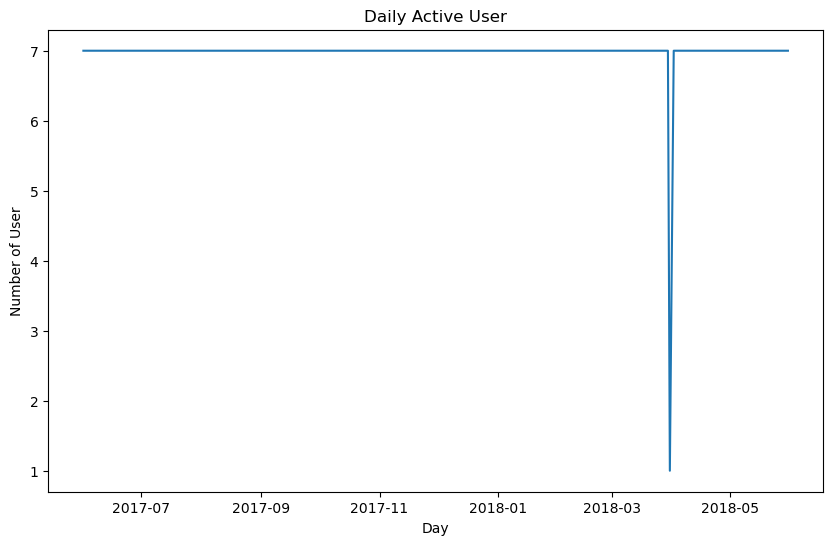

In [73]:
DAU.plot(figsize=(10, 6))
plt.title('Daily Active User')
plt.xlabel('Day')
plt.ylabel('Number of User')
plt.show()

In [74]:
# WAU:
visits_data['dt'] = pd.to_datetime(visits_data['dt'])
visits_data['week'] = visits_data['dt'].dt.strftime('%Y-%W')
WAU = visits_data.groupby('week')['source_id'].nunique()

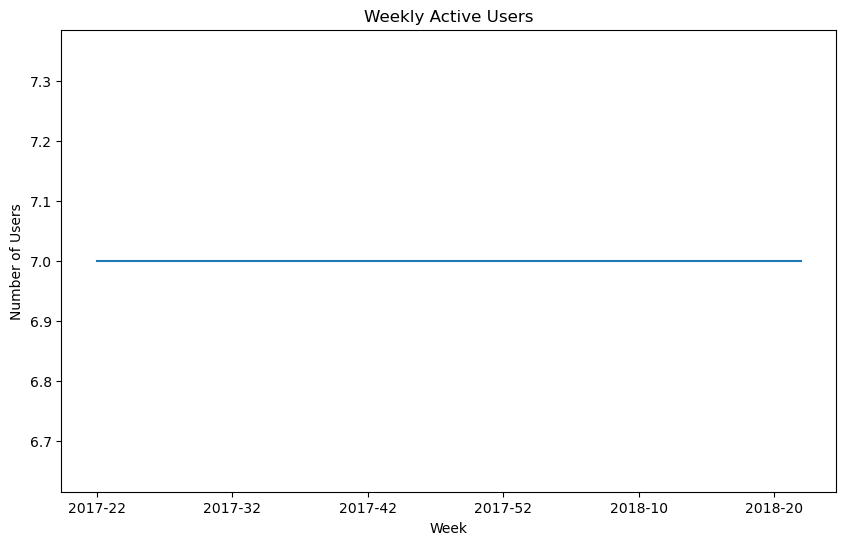

In [75]:
WAU.plot(figsize=(10, 6))
plt.title('Weekly Active Users')
plt.xlabel('Week')
plt.ylabel('Number of Users')  
plt.show()

In [76]:
# MAU:
visits_data['dt'] = pd.to_datetime(visits_data['dt'])
visits_data['month'] = visits_data['dt'].dt.strftime('%Y-%m')
MAU = visits_data.groupby('month')['source_id'].nunique()

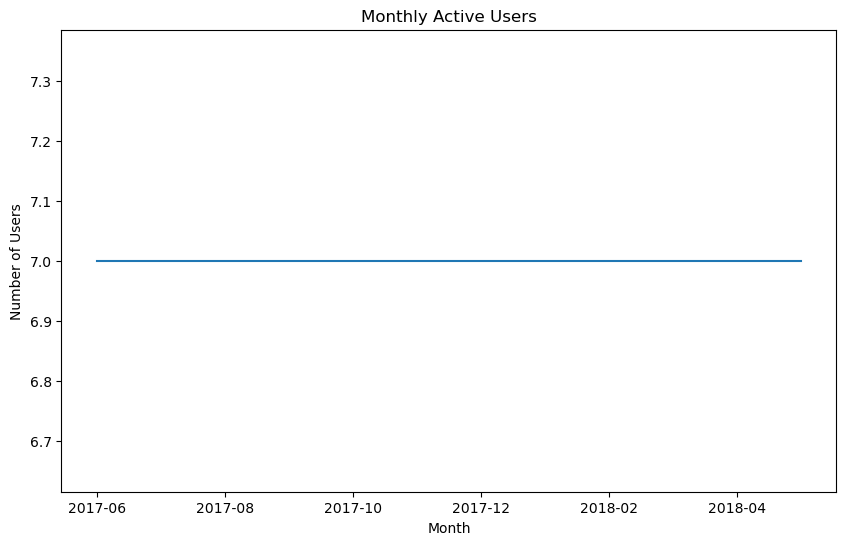

In [77]:
MAU.plot(figsize=(10, 6))
plt.title('Monthly Active Users')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.show()

In [78]:
#Calculate Number of Sessions per Day
sessions_per_day = visits_data.groupby('day').size()

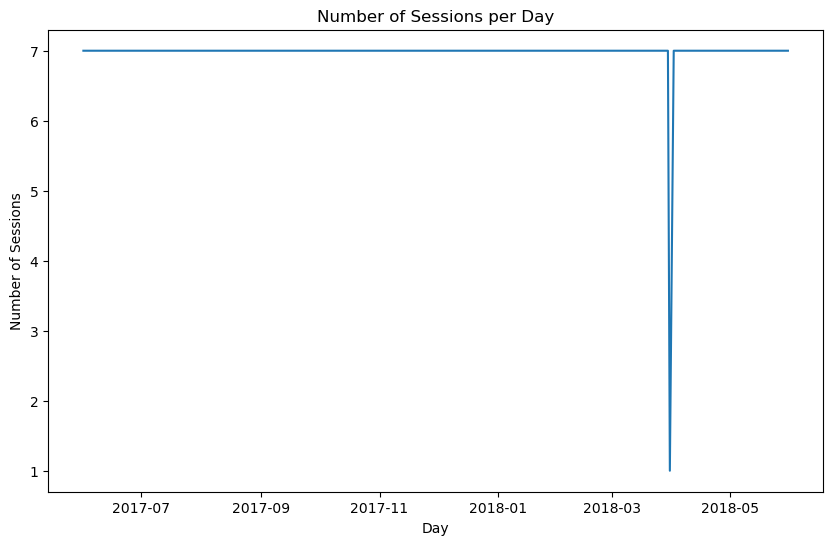

In [79]:
#Number of Sessions per Day
sessions_per_day.plot(figsize=(10, 6))
plt.title('Number of Sessions per Day')
plt.xlabel('Day')
plt.ylabel('Number of Sessions')
plt.show()

In [80]:
first_visit = visits_data.groupby('source_id')['dt'].min()
visits_data = visits_data.merge(first_visit.reset_index(), on='source_id', how='left', suffixes=('', '_first'))

Sales Analysis

In [81]:
first_visit = orders_data.groupby('Uid')['Buy Ts'].min()
first_visit = first_visit.reset_index()
first_visit.columns = ['Uid', 'Buy Ts_first']

In [82]:
orders_data = orders_data.merge(first_visit, on='Uid', how='left')
orders_data['time_to_purchase'] = (pd.to_datetime(orders_data['Buy Ts']) - pd.to_datetime(orders_data['Buy Ts_first'])).dt.total_seconds() / 86400

Text(0.5, 0, 'Date')

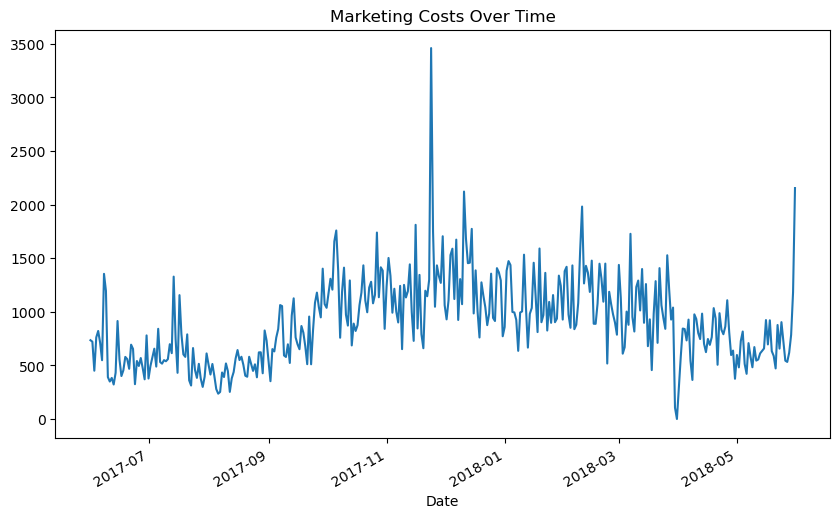

In [83]:
# Marketing Costs Over Time 
costs_data.groupby('dt')['costs'].sum().plot(figsize=(10, 6))
plt.title('Marketing Costs Over Time')
plt.xlabel('Date')

In [84]:
first_visit = orders_data.groupby('Uid')['Buy Ts'].min()
first_visit = first_visit.reset_index()
first_visit.columns = ['Uid', 'Buy Ts_first']

print(first_visit.head())

                Uid        Buy Ts_first
0   313578113262317 2018-01-03 21:51:00
1  1575281904278712 2017-06-03 10:13:00
2  2429014661409475 2017-10-11 18:33:00
3  2464366381792757 2018-01-28 15:54:00
4  2551852515556206 2017-11-24 10:14:00


In [85]:
orders_data = orders_data.merge(first_visit, on='Uid', how='left')

print(orders_data.head())

               Buy Ts  Revenue                   Uid      Buy Ts_first_x  \
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   

   time_to_purchase      Buy Ts_first_y  
0               0.0 2017-06-01 00:10:00  
1               0.0 2017-06-01 00:25:00  
2               0.0 2017-06-01 00:27:00  
3               0.0 2017-06-01 00:29:00  
4               0.0 2017-06-01 07:58:00  


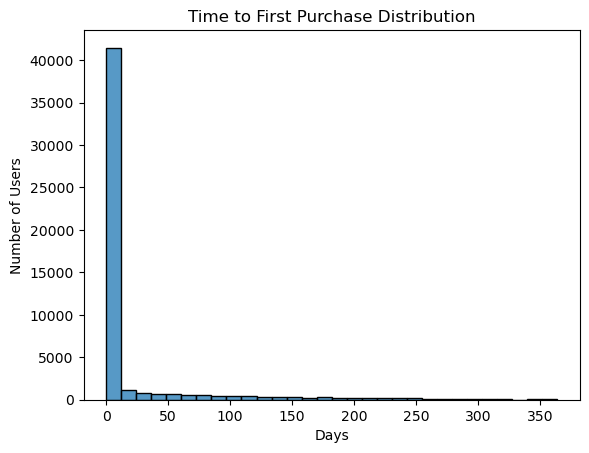

In [86]:
sns.histplot(orders_data['time_to_purchase'], bins=30, kde=False)
plt.title('Time to First Purchase Distribution')
plt.xlabel('Days')
plt.ylabel('Number of Users')
plt.show()

In [87]:
# Number of Orders
#Grouped by the desired time period and count orders:

orders_data['period'] = orders_data['Buy Ts'].dt.to_period('M')  # 'M' for monthly period, change as needed
orders_per_period = orders_data.groupby('period')['Uid'].count()

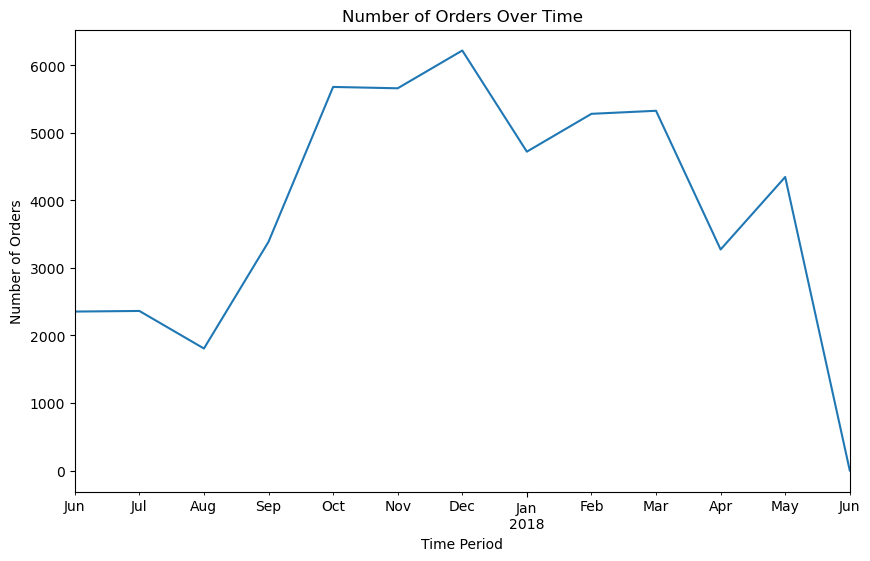

In [88]:
#Number of Orders Over Time
orders_per_period.plot(figsize=(10, 6))  
plt.title('Number of Orders Over Time')
plt.xlabel('Time Period')
plt.ylabel('Number of Orders')
plt.show()